## Question 2:
> Adaboost

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np
import random

In [38]:
def read_data2():
    pnts=[]
    with open('data/four_circle.txt', 'r') as text:
        for line in text.readlines():
            _x, _y, _label = line.split()
            #lines.append(Line())
            pnts.append(Point(float(_x),float(_y),int(_label)))
    pnts=np.array(pnts)
    rules=create_lines(pnts)
    return pnts,rules

def create_lines(points):
    rules=[]
    for i in range(len(points)):
        p1=points[i]
        for j in range(i+1,len(points)):
            p2=points[j]
            rules.append(Line(p1,p2,1))
            rules.append(Line(p1,p2,-1))
    return np.array(rules)

def split_data(points: list):
    """
    splits the data into train and test //maybe wil be depraceted later
    :param points: list of data points
    :return: train & test groups.
    """
    return train_test_split(points, test_size=0.5)

In [39]:
class Point:
    def __init__(self, x: float, y: float, label: int):
        """
        :param x: X-axis
        :param y: Y-axis
        :param label: The given data point label
        """
        self.x = x
        self.y = y
        self.label = label
        self.w = 0

#     def toArray(self):
#         """
#         This function converts a single data point into array: [x, y, label]
#         :return: array
#         """
#         return [self.x, self.y, self.label]

In [40]:
class Line:
    def __init__(self, p1: Point, p2: Point, direct: int):
        """
        - Rule: y=ax+b
        :param point: Single point for computing line equation.
        :param coefficient: a
        :param bias: b
        """
        self.p1 = p1
        self.p2 = p2
        #self.a = (self.p1.y - self.p2.y)
        self.x=self.p1.x-self.p2.x
        self.y=self.p1.y-self.p2.y
#         self.b = (self.p2.x - self.p1.x)
#         self.c = (self.p1.x * self.p2.y - self.p2.x * self.p1.y)
        self.direct = direct
        self.w=0

    def eval(self, p: Point):
        """
        we will use the following equation to determine the label of a point
        value = (x1 - x0)(y2 - y0) - (x2 - x0)(y1 - y0)
        if value > 0, p2 is on the left side of the line.
        if value = 0, p2 is on the same line.
        if value < 0, p2 is on the right side of the line.
        :return: eval
        """
        if self.x*(p.x-self.p2.x)-(p.x-self.p2.x)*self.y>=0:
            return self.direct
        else:
            return -self.direct

In [41]:
t=[]
def predict(rules: list, point: Point):
    """
    This function predicts the true label of a points based
    on the rules given with their corresponding weights
    Hk(X) from the presentation
    """
    sums = 0
    for h in rules:
        sums += h.w * h.eval(point)
    return 1 if sums > 0 else -1


def point_error(rules: list, point: Point):
    """
    This function calculates the error on given point with a given set of rules
    """
    return 1 if predict(rules, point) != point.label else 0


def list_error(rules: list, points: list):
    """
      This function calculates the error on given points
      """
    total_error = 0
    for p in points:
        error = point_error(rules, p)
        total_error += error

    return total_error / len(points)


def calculate_error(rules: list, train: list, test: list, iterations: int):
    """
    This function calculates the empirical error on the training and test sets.
    """
    #train_errors, test_errors = ([] for _ in range(2))
    tr_errors = []
    te_errors = []
    iterations = len(rules) if iterations > len(rules) else iterations
    for i in range(iterations):
        tr_errors.append(list_error(rules[:i + 1], train))
        te_errors.append(list_error(rules[:i + 1], test))
    return tr_errors, te_errors


def run(points: list, rules: list, iterations: int):
    """
    This function simulates a single run of Adaboost algorithm.
    :param points: list of data points
    :param iterations: number of iterations to perform the algorithm.
    :return:
    """
    train, test = split_data(points)
    for pt in train:
        pt.w = 1 / len(train)  # Initialize point weights
    min_lines = []
    for i in range(iterations):
        min_error = np.inf  # Find the min error each iteration and the classifier.
        min_clfs = []
        for h in rules:
            error = 0
            for pt in train:
                # step 3 , caculate weighted error
                if h.eval(pt) != pt.label:
                    error += pt.w

            if len(min_clfs) == 0 or error <= min_error:  # Find min. error classifier step 4
                if error != min_error:  # if its smaller than the current min classifier then change it
                    min_error = error
                    min_clfs.clear()
                min_clfs.append(h)
        clf_weight = 0.5*np.log((1 - min_error) / min_error)  # Update classifier weight based on error , step 5
        Zt = 0
        # min_clf = min_clfs[0] #get the best classifier#random.choice(min_classifiers)
        min_clf = random.choice(min_clfs)
        for pt in train:
            # Calculate the normalizing constant (Zt) step 5.5 and update all the points weights
            pt.w = pt.w / (np.e ** (clf_weight * min_clf.eval(pt) * pt.label))
            Zt += pt.w
        for pt in train:
            pt.w = pt.w / Zt
        min_clf.w=clf_weight
        min_lines.append(min_clf)
        t.append(min_clf)
    return calculate_error(min_lines, train, test, iterations)

    # TODO - Return the empirical error of the function H on the training set and on the test set.

In [42]:
dots, lines = read_data2()
#lines = create_lines(points)
iterations = 8
rounds = 100
error_means_train=[]
error_means_test=[]
train_errors= np.zeros(shape=(rounds,iterations))
test_errors = np.zeros(shape=(rounds,iterations))

for a in range(rounds):
    train_error, test_error = run(dots, lines, iterations)
    error_means_train.append(np.mean(train_error))
    error_means_test.append(np.mean(test_error))
    
    for b in range(iterations):
        train_errors[a][b] = train_error[b]

        test_errors[a][b] = test_error[b]

print("error")
for c in range(iterations):
    print(f"k = {c + 1}",
          "train error: ", "%.3f" % np.mean(train_errors[:,c]),
          "test error: ", "%.3f" % np.mean(test_errors[:,c]))
    
def points_array(points: list, lines: list):
    """
    This function receives a list of data points and converts it to 4 different lists:
    - X and Y list of data points for each label.
    """
    x1, y1, x2, y2 = ([] for _ in range(4))
    for pt in points:
        if pt.label != predict_value(lines, pt):
            x1.append(pt.x)
            y1.append(pt.y)
        else:
            x2.append(pt.x)
            y2.append(pt.y)
    return x1, y1, x2, y2


def represent_data_points(points: list, rules_with_weights: list):
    """
    This function plots the data points.
    :param points: list of data points to plot.
    :return: None
    """
    x1, y1, x2, y2 = generate_data_lists(points, rules_with_weights)
    plt.scatter(x1, y1, color='red')
    plt.scatter(x2, y2, color='blue')

    for rule in lines:
        r = rule
        plt.plot([r.p1.x, r.p1.y], [r.p2.x, r.p2.y], marker='o')

#     # TODO - Add classifier lines

#     plt.show()


error
k = 1 train error:  0.057 test error:  0.067
k = 2 train error:  0.067 test error:  0.087
k = 3 train error:  0.063 test error:  0.060


IndexError: list index out of range

In [53]:
train_errors[0,:]

array([0.18666667, 0.26666667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [50]:
for c in range(3):
    print(f"k = {c + 1}",
          "train error: ", "%.3f" % np.mean(train_errors[:,c]),
          "test error: ", "%.3f" % np.mean(test_errors[:,c]))
    

k = 1 train error:  0.213 test error:  0.271
k = 2 train error:  0.284 test error:  0.227
k = 3 train error:  0.000 test error:  0.009


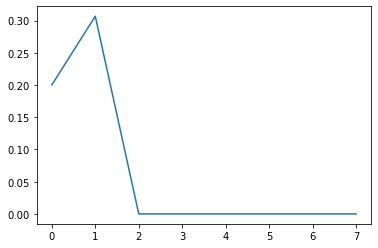

In [46]:
n=[]
for i in range(8):
    n.append(train_errors[2][i])
plt.plot(n)

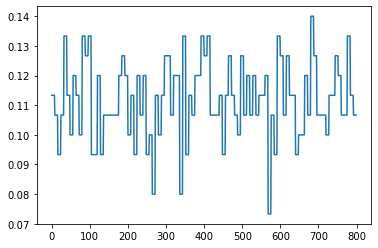

In [63]:
plt.plot(train_errors.flatten())
plt.show()

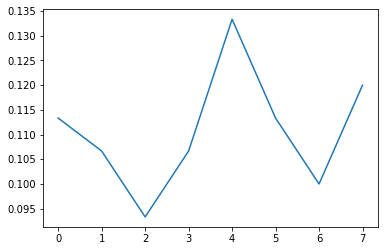

In [69]:
k=[]
for i in range(iterations):
    k.append(train_errors[i][0])
plt.plot(k)


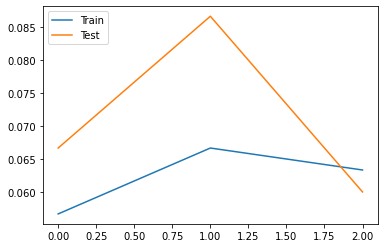

In [47]:
plt.plot(error_means_train,label='Train')
plt.plot(error_means_test,label='Test')
plt.legend(loc="upper left")
plt.show()


In [95]:
def most_important(lines):
    min_l=lines[0]
    imp=[]
    for j in range(8):
        min_lw=-np.inf
        for i in range(len(lines)):
            if lines[i].w<min_lw:
                min_l=lines[i]
                min_lw=lines[i].w
        imp.append(min_l)
        lines.delete(min_l)
    return imp

In [97]:
t.shape

(22350,)